# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [55]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn
import statsmodels.api as sm
from sklearn import metrics

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [4]:
# create a new dataframe according to the example above
student_data = pd.DataFrame({'StudentID': [1,2,3,4,5,6,7,8,9,10], 'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [8]:
# set the column "StudentID" as index for the dataframe
student_data=student_data.set_index("StudentID")

In [9]:
# review the output
student_data

,Age,Tardies
StudentID,,
1,17,10
2,51,1
3,27,5
4,21,9
5,36,4
6,48,2
7,19,9
8,26,6
9,54,0


Draw a dispersion diagram (scatter plot) for the data.

C:\Users\germa\AppData\Local\Temp\ipykernel_10732\200085942.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn");


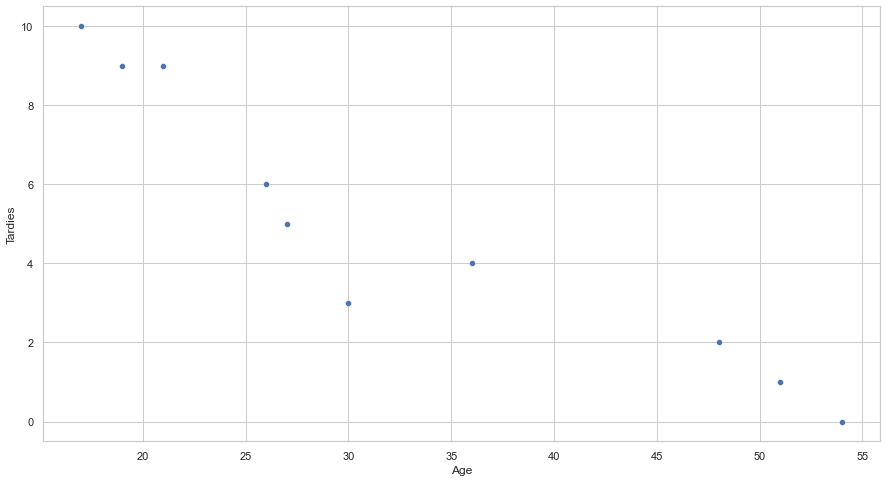

In [13]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])
plt.style.use("seaborn");

In [16]:

from pyecharts.charts import EffectScatter
from pyecharts.globals import SymbolType
from pyecharts import options as opts
 


In [20]:
v1 = student_data["Age"]
v2 = student_data["Tardies"]
x = student_data.index

c = (
EffectScatter()
 .add_xaxis(v1)
 .add_yaxis("Tardies", v2,is_selected = True,symbol_size = 15)
 .set_global_opts
 (visualmap_opts=opts.VisualMapOpts(pos_left="right",type_="color", max_=2000, min_=0,pos_bottom=50))
 .set_series_opts(
 label_opts=opts.LabelOpts(is_show=True, #whether the label will be shown
 position='right', #location of the label
 font_style='italic'), #font of the label
 effect_opts = opts.EffectOpts(scale = 3, #scale of ripples
 period=5, #period of the animation
 brush_type='fill'), #either ‘stroke’ or ‘fill’
 )
)
c.render_notebook()

In [25]:
# Just trying out some different graphs I found online with source code. 
# Looks cool, but I didn't get the time to actually clean it up. 

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [30]:
X = student_data['Age']
y = student_data['Tardies']

X = sm.add_constant(X) # add constant intercept term

model = sm.OLS(y, X, data=student_data).fit()

print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        16:13:44   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

c:\Users\germa\miniconda3\envs\ironhack\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['data']
  warnings.warn(msg, ValueWarning)
c:\Users\germa\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the scatter plot, we can see that there is a negative relationship between Age and Tardies - as age increases, the number of tardies tends to decrease.



Hypotesis1: As a student gets older, they become more responsible and are less likely to be tardy for class.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [29]:
covariance = student_data['Age'].cov(student_data['Tardies'])
correlation = student_data['Age'].corr(student_data['Tardies'])

print(f'Covariance: {covariance}')
print(f'Correlation: {correlation}')

# In this case, the negative covariance (-45.5667) 
# indicates that as age increases, the number of tardies tends to decrease. 
# The negative correlation (-0.94) 
# reinforces this relationship and indicates that the strength of the linear relationship 
# between Age and Tardies is very strong.

# Correlation DOES NOT imply causation, so we cannot conclude that age CAUSES fewer tardies.

Covariance: -45.56666666666666
Correlation: -0.9391626886887122


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [31]:
lr = LinearRegression()

In [32]:
lr.fit(
    X = student_data[["Age"]], # These are the variables
    y = student_data["Tardies"] # This is OUR ONE TARGET
)

LinearRegression()

In [33]:
[i for i in dir(lr)][:1]

['__abstractmethods__']

In [34]:
lr.intercept_

12.888803363135771

In [35]:
lr.coef_

array([-0.24282077])

In [36]:
student_data["prediction_through_scikitlearn"] = lr.coef_[0] * student_data["Age"] + lr.intercept_

In [37]:
student_data

,Age,Tardies,prediction_through_scikitlearn
StudentID,,,
1,17,10,8.760850
2,51,1,0.504944
3,27,5,6.332643
4,21,9,7.789567
5,36,4,4.147256
6,48,2,1.233406
7,19,9,8.275209
8,26,6,6.575463
9,54,0,-0.223518


In [40]:
student_data["error_scikitlearn"] = (student_data["Tardies"] - student_data.prediction_through_scikitlearn).abs()

In [41]:
student_data

,Age,Tardies,prediction_through_scikitlearn,error_scikitlearn
StudentID,,,,
1,17,10,8.760850,1.239150
2,51,1,0.504944,0.495056
3,27,5,6.332643,1.332643
4,21,9,7.789567,1.210433
5,36,4,4.147256,0.147256
6,48,2,1.233406,0.766594
7,19,9,8.275209,0.724791
8,26,6,6.575463,0.575463
9,54,0,-0.223518,0.223518


In [42]:
student_data.error_scikitlearn.mean()

0.9319083427082718

Plot your regression model on your scatter plot.

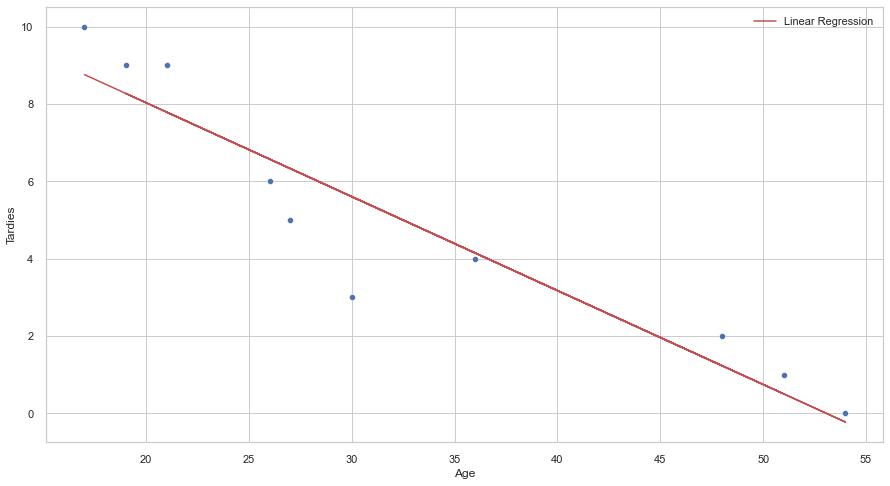

In [45]:
sns.scatterplot(x=student_data["Age"], y=student_data["Tardies"])
plt.plot(student_data["Age"], student_data.prediction_through_scikitlearn, label="Linear Regression", color="r")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [47]:
student_data["avg"] = student_data["Tardies"].mean()
student_data

,Age,Tardies,prediction_through_scikitlearn,error_scikitlearn,avg
StudentID,,,,,
1,17,10,8.760850,1.239150,4.9
2,51,1,0.504944,0.495056,4.9
3,27,5,6.332643,1.332643,4.9
4,21,9,7.789567,1.210433,4.9
5,36,4,4.147256,0.147256,4.9
6,48,2,1.233406,0.766594,4.9
7,19,9,8.275209,0.724791,4.9
8,26,6,6.575463,0.575463,4.9
9,54,0,-0.223518,0.223518,4.9


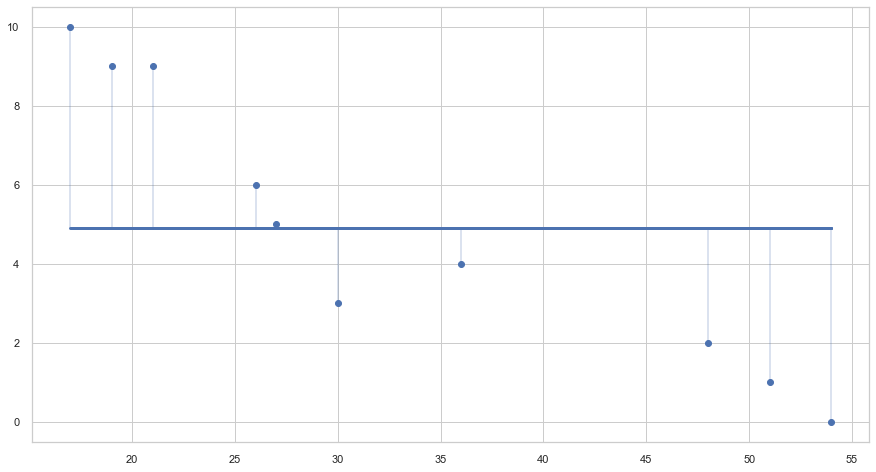

In [48]:
X = student_data["Age"]
y = student_data["Tardies"]

plt.scatter(X, y)
plt.plot(X, student_data["avg"], lw=3)
plt.vlines(X, student_data["avg"], y, lw=0.4);
plt.plot;

In [51]:
RSS = ((student_data["Tardies"] - student_data.prediction_through_scikitlearn)**2).sum()

In [52]:
TSS = ((student_data["Tardies"] - student_data["avg"])**2).sum()

In [53]:
r2 = 1 - (RSS/TSS)

In [54]:
r2

0.8820265558250109

In [58]:
results = smf.ols("Tardies ~ Age", data=student_data).fit()

In [59]:
results.summary()

c:\Users\germa\miniconda3\envs\ironhack\lib\site-packages\scipy\stats\_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           5.57e-05
Time:                        16:37:56   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
Age           -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot: >

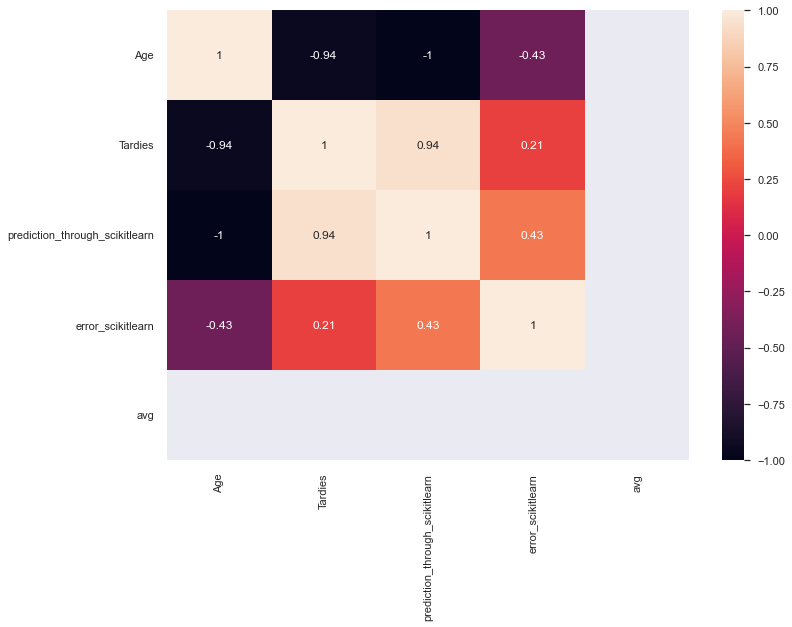

In [64]:
correlation_matrix = student_data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

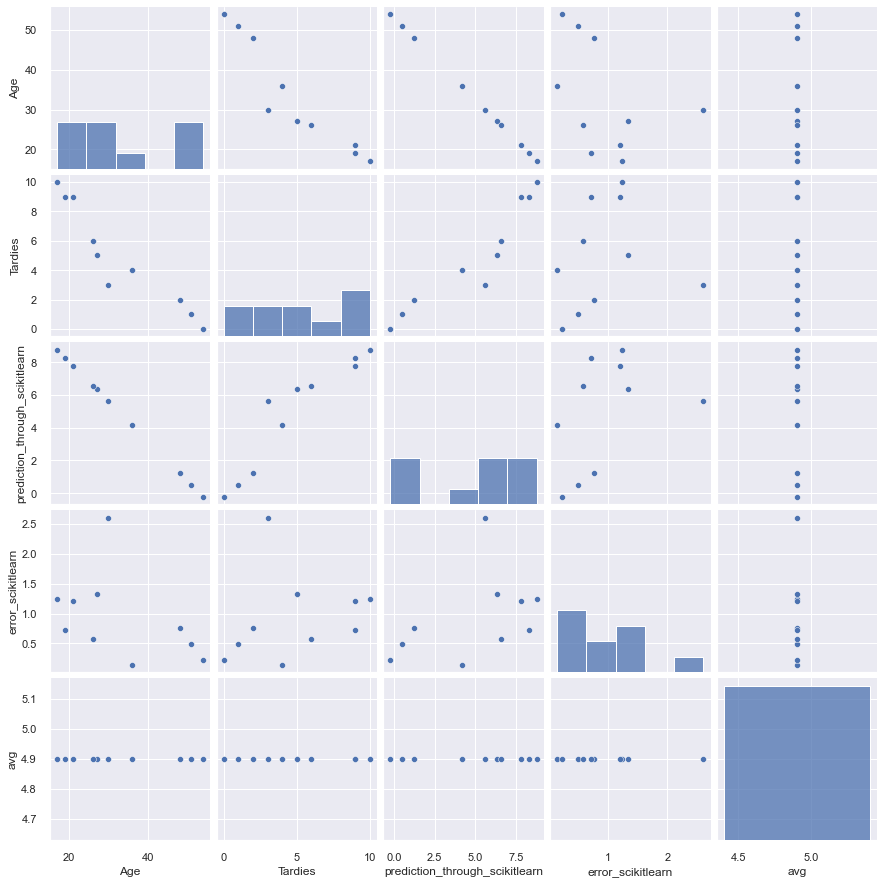

In [65]:
sns.pairplot(student_data)

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [3]:
# Import any libraries you may need & the data

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [4]:
# Your response here. 

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# Your response here. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 